In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
sal=pd.read_csv('Salary.csv')

In [3]:
sal.head()

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [4]:
sal.tail()

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
452,Trey Lyles,Utah Jazz,41,PF,20,06-Oct,234,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [5]:
sal['Position']

0      PG
1      SF
2      SG
3      SG
4      PF
       ..
452    PF
453    PG
454    PG
455     C
456     C
Name: Position, Length: 457, dtype: object

In [6]:
sal.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
DOJ          0
Weight       0
College     84
Salary      11
dtype: int64

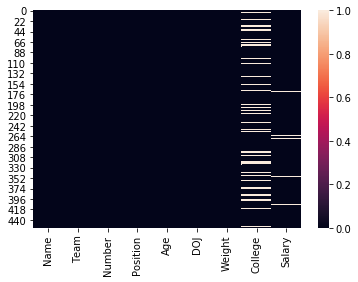

In [7]:
sns.heatmap(sal.isnull())

In [8]:
ms=sal['Salary'].mean()

In [9]:
ms

4842684.105381166

In [10]:
sal['Salary'].fillna(ms,inplace=True)

In [11]:
sal['College'].fillna('Not Available', inplace=True)

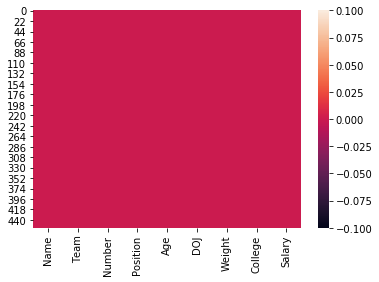

In [12]:
sns.heatmap(sal.isnull())

In [13]:
sal.isnull().sum()

Name        0
Team        0
Number      0
Position    0
Age         0
DOJ         0
Weight      0
College     0
Salary      0
dtype: int64

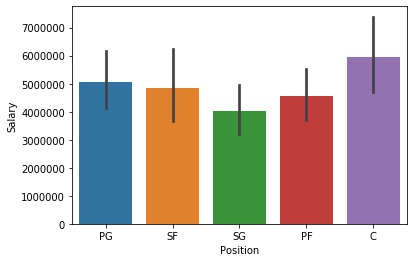

In [15]:
sns.barplot(sal['Position'],sal['Salary'])

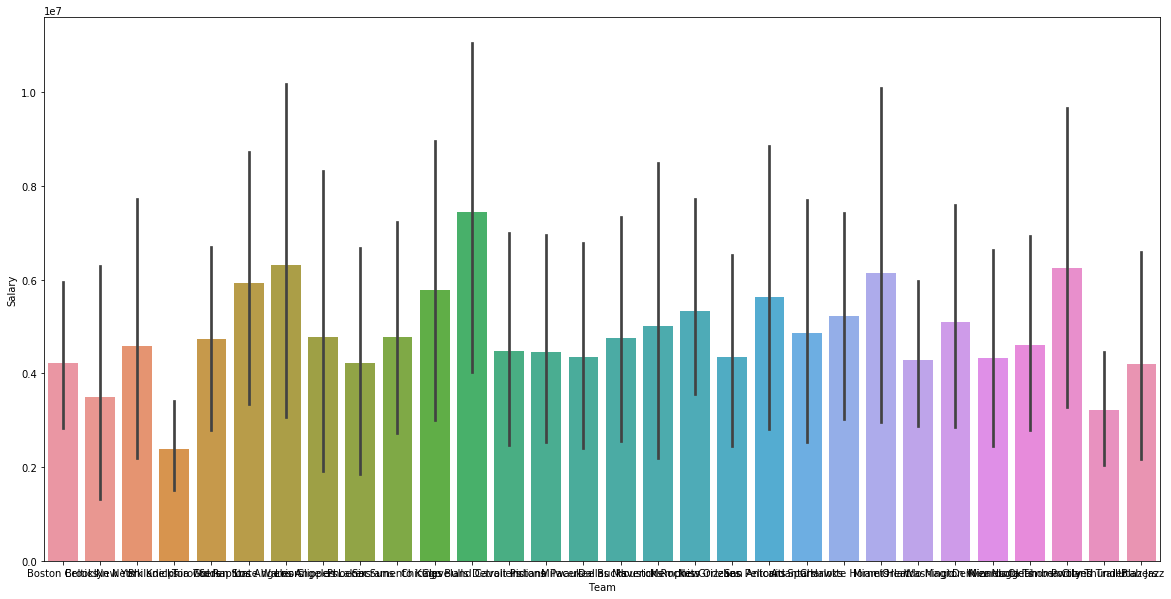

In [16]:
plt.figure(figsize=(20,10))
sns.barplot(sal['Team'],sal['Salary'])

In [17]:
#label encoder

In [18]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [19]:
lb=LabelEncoder()


In [20]:
lb.fit(sal['Position'])

LabelEncoder()

In [21]:
lb.classes_

array(['C', 'PF', 'PG', 'SF', 'SG'], dtype=object)

In [22]:
sal['Position']=lb.fit_transform(sal['Position'])

In [23]:
sal['Position']

0      2
1      3
2      4
3      4
4      1
      ..
452    1
453    2
454    2
455    0
456    0
Name: Position, Length: 457, dtype: int32

In [24]:
lb.fit(sal['Team'])

LabelEncoder()

In [25]:
lb.classes_

array(['Atlanta Hawks', 'Boston Celtics', 'Brooklyn Nets',
       'Charlotte Hornets', 'Chicago Bulls', 'Cleveland Cavaliers',
       'Dallas Mavericks', 'Denver Nuggets', 'Detroit Pistons',
       'Golden State Warriors', 'Houston Rockets', 'Indiana Pacers',
       'Los Angeles Clippers', 'Los Angeles Lakers', 'Memphis Grizzlies',
       'Miami Heat', 'Milwaukee Bucks', 'Minnesota Timberwolves',
       'New Orleans Pelicans', 'New York Knicks', 'Oklahoma City Thunder',
       'Orlando Magic', 'Philadelphia 76ers', 'Phoenix Suns',
       'Portland Trail Blazers', 'Sacramento Kings', 'San Antonio Spurs',
       'Toronto Raptors', 'Utah Jazz', 'Washington Wizards'], dtype=object)

In [26]:
sal['Team']=lb.fit_transform(sal['Team'])

In [27]:
sal['Team']

0       1
1       1
2       1
3       1
4       1
       ..
452    28
453    28
454    28
455    28
456    28
Name: Team, Length: 457, dtype: int32

In [28]:
salcorr=sal.corr()

In [29]:
salcorr

,Team,Number,Position,Age,Weight,Salary
Team,1.000000,-0.054748,-0.009638,-0.042344,-0.001000,-0.039337
Number,-0.054748,1.000000,-0.177229,0.028724,0.206921,-0.111436
Position,-0.009638,-0.177229,1.000000,-0.062992,-0.590791,-0.094108
Age,-0.042344,0.028724,-0.062992,1.000000,0.087183,0.210627
Weight,-0.001000,0.206921,-0.590791,0.087183,1.000000,0.135552
Salary,-0.039337,-0.111436,-0.094108,0.210627,0.135552,1.000000


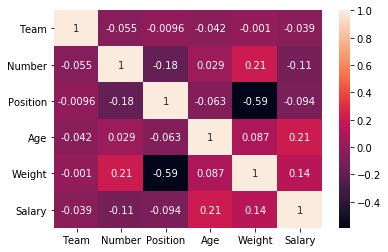

In [30]:
sns.heatmap(salcorr,annot=True)

In [31]:
sal.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'DOJ', 'Weight', 'College',
       'Salary'],
      dtype='object')

In [32]:
sal.drop(['Name','DOJ','College','Weight'] ,axis=1, inplace=True)

In [33]:
sal

,Team,Number,Position,Age,Salary
0,1,0,2,25,7.730337e+06
1,1,99,3,25,6.796117e+06
2,1,30,4,27,4.842684e+06
3,1,28,4,22,1.148640e+06
4,1,8,1,29,5.000000e+06
...,...,...,...,...,...
452,28,41,1,20,2.239800e+06
453,28,8,2,26,2.433333e+06
454,28,25,2,24,9.000000e+05
455,28,21,0,26,2.900000e+06


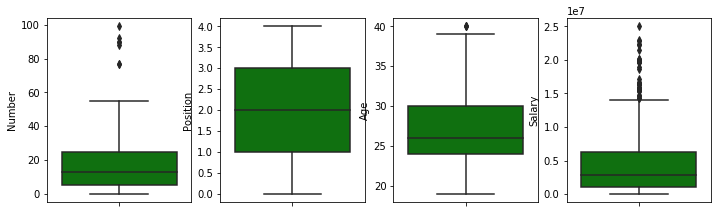

In [34]:
collist=sal.columns.values
ncol=5
nrows=10
plt.figure(figsize=(15,ncol*8))
for i in range (1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(sal[collist[i]],color='green',orient='v')

In [35]:
from scipy.stats import zscore
z=np.abs(zscore(sal))
z

array([[1.57366745e+00, 1.10845611e+00, 5.13811794e-02, 4.40701238e-01,
        5.59609022e-01],
       [1.57366745e+00, 5.09898044e+00, 6.60170305e-01, 4.40701238e-01,
        3.78563045e-01],
       [1.57366745e+00, 7.72585267e-01, 1.37172179e+00, 1.39273529e-02,
        1.80484475e-16],
       ...,
       [1.56882854e+00, 4.59078370e-01, 5.13811794e-02, 6.68015534e-01,
        7.64067455e-01],
       [1.56882854e+00, 2.08272853e-01, 1.47448415e+00, 2.13386943e-01,
        3.76479997e-01],
       [1.56882854e+00, 3.96376991e-01, 1.47448415e+00, 2.13386943e-01,
        7.54905662e-01]])

In [36]:
threshold=3

In [37]:
print(np.where(z>3))

(array([  1,   5,  33,  68, 100, 109, 169, 222, 251, 339, 372, 391, 398],
      dtype=int64), array([1, 1, 4, 1, 4, 4, 4, 1, 4, 4, 1, 1, 1], dtype=int64))


In [38]:
z[1][1]

5.098980439706314

In [39]:
sal_new=sal[(z<3).all(axis=1)]

In [40]:
sal_new.shape

(444, 5)

In [41]:
sal.shape

(457, 5)

In [42]:
sal=sal_new

In [43]:
x=sal.iloc[:,0:-1]

In [44]:
x.head()

,Team,Number,Position,Age
0,1,0,2,25
2,1,30,4,27
3,1,28,4,22
4,1,8,1,29
6,1,55,1,21


In [60]:
y=sal.iloc[:,-1]

In [61]:
y.head()

0    7.730337e+06
2    4.842684e+06
3    1.148640e+06
4    5.000000e+06
6    1.170960e+06
Name: Salary, dtype: float64

In [62]:
print(y)

0      7.730337e+06
2      4.842684e+06
3      1.148640e+06
4      5.000000e+06
6      1.170960e+06
           ...     
452    2.239800e+06
453    2.433333e+06
454    9.000000e+05
455    2.900000e+06
456    9.472760e+05
Name: Salary, Length: 444, dtype: float64


In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

max_score=0
final_rstate=0

for i in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=100,random_state=i)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    s=lm.score(x_train,y_train)
    pred=lm.predict(x_test)
    r_score=r2_score(y_test,pred)
    print("R2 SCORE is equal to :",r_score,"at random state",i)
    
    if r_score > max_score:
        max_score=r_score
        final_rstate=i
        
        
    
    
print("The maximum r2_score is ",max_score, "at random state",final_rstate) 

R2 SCORE is equal to : 0.08726211736741141 at random state 42
R2 SCORE is equal to : -0.0039425650030140424 at random state 43
R2 SCORE is equal to : -0.05948075299712974 at random state 44
R2 SCORE is equal to : 0.02702147163545643 at random state 45
R2 SCORE is equal to : -0.034054835341073675 at random state 46
R2 SCORE is equal to : -0.020937815003959637 at random state 47
R2 SCORE is equal to : 0.059149304480606735 at random state 48
R2 SCORE is equal to : -0.04347543589852543 at random state 49
R2 SCORE is equal to : -0.06115337133007981 at random state 50
R2 SCORE is equal to : 0.0672845484434712 at random state 51
R2 SCORE is equal to : 0.04352035659877329 at random state 52
R2 SCORE is equal to : 0.07424010180525131 at random state 53
R2 SCORE is equal to : 0.07832615674180443 at random state 54
R2 SCORE is equal to : -0.09290573002839886 at random state 55
R2 SCORE is equal to : 0.07660049150130732 at random state 56
R2 SCORE is equal to : -0.09145933766466663 at random state

In [67]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lm,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
    

[ 0.08924851  0.05074965 -0.09001727  0.0749085   0.0054553 ]
0.02606893761672755
0.06463285134223665


In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=100,random_state=63)
lm=LinearRegression()
lm.fit(x_train,y_train)
s=lm.score(x_train,y_train)
pred=lm.predict(x_test)
r_score=r2_score(y_test,pred)

In [70]:
print("R2Score is ",r_score)

print("ERROR")


print("MEan Absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_absolute_error(y_test,pred))

print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))



R2Score is  0.09318464484744848
ERROR
MEan Absolute error: 3407025.354105202
Mean squared error: 3407025.354105202
Root mean squared error: 4444630.5619970495


In [71]:
from sklearn.externals import joblib
joblib.dump(lm,"lm_Salary.pkl")

['lm_Salary.pkl']